# Notebook \# 6
Name:Riley Rongere
Date:4/25/2023

## Problem Description:
Using a convolutional neural network, train a model to assist in the diagnoses of pneumonia by training and testing on chest x-ray images of both healthy individuals and individuals who have pneumonia.


### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [ ]:
import keras
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167-Machine_Learning/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build your CNN here
%tensorflow_version 2.x
# import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))


# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
163/163 [==============================] - 907s 5s/step - loss: 0.3371 - accuracy: 0.8556 - val_loss: 0.4398 - val_accuracy: 0.7837
Epoch 2/5
163/163 [==============================] - 17s 105ms/step - loss: 0.1917 - accuracy: 0.9233 - val_loss: 0.6262 - val_accuracy: 0.7228
Epoch 3/5
163/163 [==============================] - 18s 109ms/step - loss: 0.1467 - accuracy: 0.9427 - val_loss: 0.4695 - val_accuracy: 0.7949
Epoch 4/5
163/163 [==============================] - 19s 116ms/step - loss: 0.1281 - accuracy: 0.9546 - val_loss: 0.5598 - val_accuracy: 0.7756
Epoch 5/5
163/163 [==============================] - 17s 105ms/step - loss: 0.1138 - accuracy: 0.9572 - val_loss: 0.7125 - val_accuracy: 0.7692


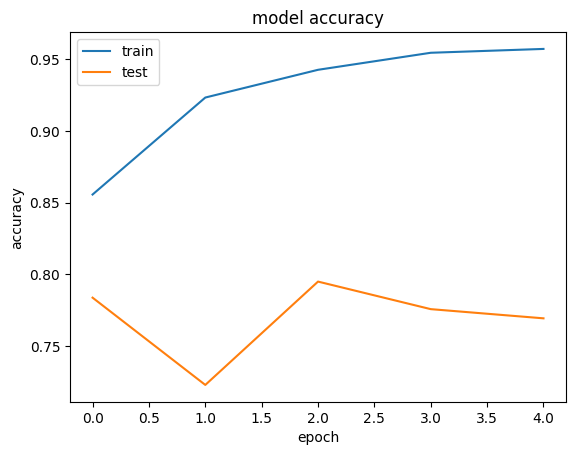

In [ ]:
# import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Changes

- Change the density of the second Conv2D layer to 64
- Added a Con2D layer and MaxPooking layer with density 128
- Changed the fully connected layer to density 128

In [ ]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128)) #fully-connected layer
model2.add(Dense(1,activation='sigmoid'))


# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
163/163 [==============================] - 19s 112ms/step - loss: 0.4431 - accuracy: 0.8008 - val_loss: 0.4635 - val_accuracy: 0.7756
Epoch 2/5
163/163 [==============================] - 18s 108ms/step - loss: 0.2010 - accuracy: 0.9227 - val_loss: 0.6888 - val_accuracy: 0.7292
Epoch 3/5
163/163 [==============================] - 17s 105ms/step - loss: 0.1516 - accuracy: 0.9410 - val_loss: 0.4215 - val_accuracy: 0.8205
Epoch 4/5
163/163 [==============================] - 17s 107ms/step - loss: 0.1465 - accuracy: 0.9484 - val_loss: 1.2137 - val_accuracy: 0.6811
Epoch 5/5
163/163 [==============================] - 18s 112ms/step - loss: 0.1330 - accuracy: 0.9496 - val_loss: 0.8601 - val_accuracy: 0.7147


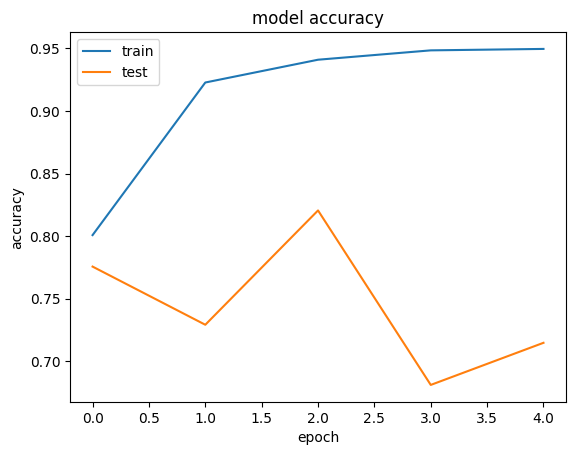

In [ ]:
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusions
- What configuration of your CNN proved to be more accurate? Why do you think this is the case?

The configuration with less layers of lower densiity proved to perform better after 5 epochs. I think this is the case since more layers and a higher density can lead to overfitting which seems to have occured in this case. It is worth noting that at epoch 2 (3 epochs), the model with extra layers and higher density performed better than the first model did at any point.

- How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.

Reducing the number of epochs of the second model to 3 should increase my accuracy to about .82.